In [1]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def dijkstra(graph, start):
    # Initialize distances and priority queue
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    pq = [(0, start)]  # Priority queue, starting with the start node

    while pq:
        current_distance, current_node = heapq.heappop(pq)

        # If we found a shorter path before
        if current_distance > distances[current_node]:
            continue

        # Check neighbors
        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight

            # If a shorter path is found
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor))

    return distances

In [3]:
# Example graph represented as an adjacency list
graph = {
    'A': {'B': 5, 'C': 1},
    'B': {'A': 5, 'C': 2, 'D': 1},
    'C': {'A': 1, 'B': 2, 'D': 4, 'E': 8},
    'D': {'B': 1, 'C': 4, 'E': 3},
    'E': {'C': 8, 'D': 3}
}
graph

{'A': {'B': 5, 'C': 1},
 'B': {'A': 5, 'C': 2, 'D': 1},
 'C': {'A': 1, 'B': 2, 'D': 4, 'E': 8},
 'D': {'B': 1, 'C': 4, 'E': 3},
 'E': {'C': 8, 'D': 3}}

In [4]:
# Execute Dijkstra's algorithm
start_node = 'A'
distances = dijkstra(graph, start_node)
distances

{'A': 0, 'B': 3, 'C': 1, 'D': 4, 'E': 7}

In [5]:
# Print the shortest distances from the start node to each other node
print(f"Shortest distances from node {start_node}:")
for node, distance in distances.items():
    print(f"Distance to {node}: {distance}")

Shortest distances from node A:
Distance to A: 0
Distance to B: 3
Distance to C: 1
Distance to D: 4
Distance to E: 7


In [6]:
def plot_graph(graph, distances, start_node):
    G = nx.Graph()

    # Add edges to the graph
    for node in graph:
        for neighbor, weight in graph[node].items():
            G.add_edge(node, neighbor, weight=weight)

    pos = nx.spring_layout(G)  # Layout for nodes

    # Draw the graph with all edges and nodes
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, font_size=10, font_weight='bold')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    # Highlight the shortest path edges
    for node in distances:
        if node != start_node:
            # Find the shortest path using the computed distances
            path = nx.shortest_path(G, start_node, node, weight='weight')
            path_edges = list(zip(path, path[1:]))
            nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)

    plt.title(f"Graph Visualization with Shortest Paths from {start_node}")
    plt.show()

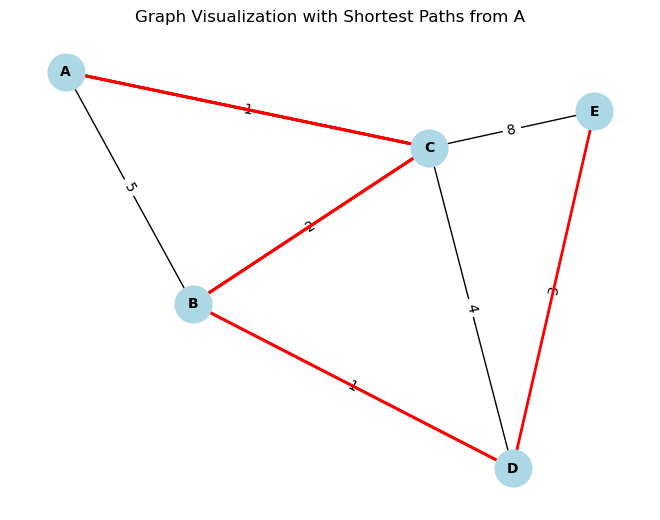

In [7]:
# Execute Dijkstra's algorithm and plot the graph
distances = dijkstra(graph, start_node)
plot_graph(graph, distances, start_node)